# Analyze the Effect of Pooling Layers

2024-05-07 14:18:54.620466: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-05-07 14:18:54.620496: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hadush-GF63-Thin-10SCSR): /proc/driver/nvidia/version does not exist
2024-05-07 14:18:54.620867: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 14:18:54.868051: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
  20/1875 [..............................] - ETA: 16s - loss: 2.1998 - accuracy: 0.2484

2024-05-07 14:18:55.408249: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2024-05-07 14:18:55.408269: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2024-05-07 14:18:55.416776: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2024-05-07 14:18:55.416817: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2632 - accuracy: 0.9191 - val_loss: 0.0449 - val_accuracy: 0.9843
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0915 - accuracy: 0.9747 - val_loss: 0.0357 - val_accuracy: 0.9902
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0666 - accuracy: 0.9811 - val_loss: 0.0301 - val_accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0521 - accuracy: 0.9856 - val_loss: 0.0316 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0414 - accuracy: 0.9883 - val_loss: 0.0329 - val_accuracy: 0.9904
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3228 - accuracy: 0.9013 - val_loss: 0.0567 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1131 - accuracy: 0.9681 - val_loss: 0.0415 - val_accuracy: 0.9878
Ep

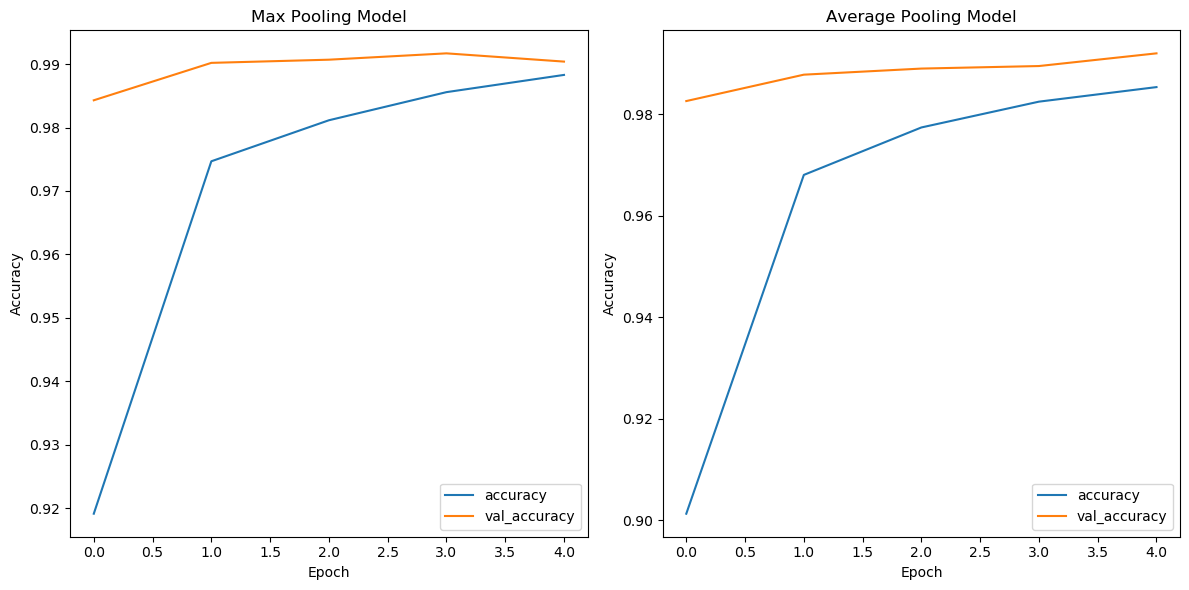

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

# Define the CNN model with max pooling
model_max_pooling = models.Sequential()
model_max_pooling.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_max_pooling.add(layers.MaxPooling2D((2, 2)))
model_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_max_pooling.add(layers.MaxPooling2D((2, 2)))
model_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_max_pooling.add(layers.Flatten())
model_max_pooling.add(layers.Dense(64, activation='relu'))
model_max_pooling.add(layers.Dropout(0.5))
model_max_pooling.add(layers.Dense(10, activation='softmax'))

# Compile the model with max pooling
model_max_pooling.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Define the CNN model with average pooling
model_avg_pooling = models.Sequential()
model_avg_pooling.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_avg_pooling.add(layers.AveragePooling2D((2, 2)))
model_avg_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_avg_pooling.add(layers.AveragePooling2D((2, 2)))
model_avg_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_avg_pooling.add(layers.Flatten())
model_avg_pooling.add(layers.Dense(64, activation='relu'))
model_avg_pooling.add(layers.Dropout(0.5))
model_avg_pooling.add(layers.Dense(10, activation='softmax'))

# Compile the model with average pooling
model_avg_pooling.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train both models
history_max_pooling = model_max_pooling.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
history_avg_pooling = model_avg_pooling.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate both models on the test set
test_loss_max_pooling, test_acc_max_pooling = model_max_pooling.evaluate(test_images, test_labels, verbose=2)
test_loss_avg_pooling, test_acc_avg_pooling = model_avg_pooling.evaluate(test_images, test_labels, verbose=2)

print("Max Pooling Model:")
print(f"Test accuracy: {test_acc_max_pooling}")

print("\nAverage Pooling Model:")
print(f"Test accuracy: {test_acc_avg_pooling}")

# Plot training history for both models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_max_pooling.history['accuracy'], label='accuracy')
plt.plot(history_max_pooling.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Max Pooling Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_avg_pooling.history['accuracy'], label='accuracy')
plt.plot(history_avg_pooling.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Average Pooling Model')
plt.legend()

plt.tight_layout()
plt.show()
